In [1]:
import os, numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

np.random.seed(42)
tf.random.set_seed(42)
os.makedirs("outputs", exist_ok=True)
print("TF version:", tf.__version__)


TF version: 2.19.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: (60000, 28, 28, 1) (60000,)
Test : (10000, 28, 28, 1) (10000,)


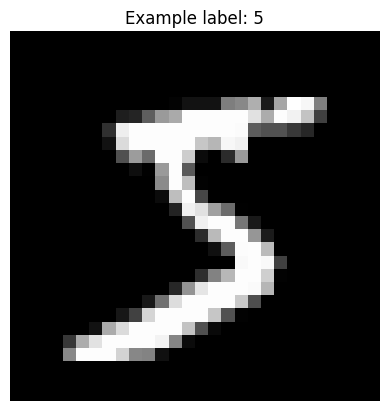

In [2]:
# Load MNIST (handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize to [0,1] and add channel dimension (for CNN)
x_train = (x_train / 255.0)[..., None]
x_test  = (x_test  / 255.0)[..., None]

print("Train:", x_train.shape, y_train.shape)
print("Test :", x_test.shape, y_test.shape)

# quick visual sanity check
plt.figure()
plt.imshow(x_train[0].squeeze(), cmap="gray")
plt.title(f"Example label: {y_train[0]}")
plt.axis("off")
plt.show()


In [3]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,            # fast + good enough
    batch_size=128,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 110ms/step - accuracy: 0.8478 - loss: 0.5270 - val_accuracy: 0.9731 - val_loss: 0.0799
Epoch 2/5


In [ ]:
# Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy over epochs")
plt.xlabel("epoch"); plt.ylabel("accuracy"); plt.legend()
plt.savefig("outputs/accuracy.png", bbox_inches="tight", dpi=120)
plt.show()

# Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss over epochs")
plt.xlabel("epoch"); plt.ylabel("loss"); plt.legend()
plt.savefig("outputs/loss.png", bbox_inches="tight", dpi=120)
plt.show()


In [ ]:
# Evaluate test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

# Predictions → confusion matrix
y_proba = model.predict(x_test, verbose=0)
y_pred  = y_proba.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
disp.plot(values_format='d')
plt.title("Confusion Matrix")
plt.savefig("outputs/confusion_matrix.png", bbox_inches="tight", dpi=120)
plt.show()


In [ ]:
# Show 12 sample predictions
fig, axes = plt.subplots(3, 4, figsize=(8,6))
idxs = np.random.choice(len(x_test), 12, replace=False)
for ax, i in zip(axes.ravel(), idxs):
    ax.imshow(x_test[i].squeeze(), cmap="gray")
    ax.set_title(f"T:{y_test[i]}  P:{y_pred[i]}")
    ax.axis("off")
plt.tight_layout()
plt.savefig("outputs/sample_predictions.png", bbox_inches="tight", dpi=120)
plt.show()
